In [1]:
# #Uncomment when on google colab
# #Import data from Google Drive 
# from google.colab import drive 
# drive.mount('/content/gdrive/')

In [167]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import os
from os import listdir
from os.path import isfile, join
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import csv

In [115]:
#Load Data
#Google colab
# TRAIN_DATA_FOLDER = 'gdrive/My Drive/CZ4041_Machine_Learning/plant_data/plant-seedlings-classification/train'

#Local
TRAIN_DATA_FOLDER = 'plant_data/plant-seedlings-classification/train'
TEST_DATA_FOLDER = 'plant_data/plant-seedlings-classification/test'

In [4]:
# #Uncomment when on google colab
# os.listdir('gdrive/My Drive/CZ4041_Machine_Learning')

In [5]:
# all_images is a dictionary mapping of each class_label to its list of images in its respective folder

all_images = {}
for class_label in os.listdir(TRAIN_DATA_FOLDER):
    folder_path = os.path.join(TRAIN_DATA_FOLDER, class_label)
    all_images[class_label] = []
    noOfPic = 0
    for image in glob(os.path.join(folder_path, "*.png")):
        #reduce bias by ensuring that the training data is equally distributed. 
        if noOfPic >= 50:
          break
        image_bgr = cv2.imread(image, cv2.IMREAD_COLOR)
        image_bgr = cv2.resize(image_bgr, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
        all_images[class_label].append(image_bgr)
        noOfPic += 1
    print(all_images[class_label][0])

[[[ 20  44  75]
  [ 43  63  88]
  [ 47  68  89]
  ...
  [ 53  72  84]
  [ 59  83  92]
  [ 54  83  90]]

 [[ 23  48  81]
  [ 43  63  90]
  [ 55  73  96]
  ...
  [ 61  76  88]
  [ 61  77  88]
  [ 60  77  89]]

 [[ 28  51  84]
  [ 35  55  85]
  [ 34  55  81]
  ...
  [ 56  69  81]
  [ 55  68  81]
  [ 60  75  87]]

 ...

 [[155 149 143]
  [155 149 144]
  [150 144 139]
  ...
  [152 145 141]
  [117 112 109]
  [ 63  56  64]]

 [[157 151 144]
  [155 150 143]
  [148 143 138]
  ...
  [155 147 144]
  [121 116 112]
  [ 61  55  61]]

 [[156 150 142]
  [155 149 141]
  [149 144 137]
  ...
  [153 145 140]
  [113 108 104]
  [ 65  59  64]]]
[[[ 46  41  50]
  [ 46  41  49]
  [ 46  45  48]
  ...
  [ 40  38  52]
  [ 47  48  62]
  [ 48  47  60]]

 [[ 53  50  54]
  [ 51  47  51]
  [ 47  44  48]
  ...
  [141 136 136]
  [133 131 130]
  [119 117 120]]

 [[ 67  62  66]
  [ 67  62  65]
  [ 62  55  59]
  ...
  [182 172 168]
  [182 176 172]
  [179 173 171]]

 ...

 [[ 60  83 103]
  [ 66  88 107]
  [ 70  90 105]
  ..

In [117]:
# all_images is a dictionary mapping of each class_label to its list of images in its respective folder

test_images = []

for image in glob(os.path.join(TEST_DATA_FOLDER, "*.png")):
    #reduce bias by ensuring that the training data is equally distributed. 
    image_bgr = cv2.imread(image, cv2.IMREAD_COLOR)
    image_bgr = cv2.resize(image_bgr, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    test_images.append(image_bgr)
print(len(test_images))

794


In [141]:
test_images_str = [f for f in listdir(TEST_DATA_FOLDER) if isfile(join(TEST_DATA_FOLDER, f))]
print(test_images_str)

['0021e90e4.png', '003d61042.png', '007b3da8b.png', '0086a6340.png', '00c47e980.png', '00d090cde.png', '00ef713a8.png', '01291174f.png', '026716f9b.png', '02cfeb38d.png', '03566743d.png', '03a2ee656.png', '03e322a29.png', '03ef36742.png', '043449b0b.png', '0437393b1.png', '04814f36d.png', '05341a8a6.png', '060450d79.png', '060f1dc84.png', '0625f063b.png', '063363305.png', '06d12f6fa.png', '071cb3ece.png', '0751c0bbc.png', '07e62f903.png', '085974290.png', '0885e7690.png', '089ad62a7.png', '08d591441.png', '0911d3dee.png', '099b961ec.png', '0a64e3e6c.png', '0ad9e7dfb.png', '0ae6668fa.png', '0bf7bfb05.png', '0c27cf05f.png', '0c4199daa.png', '0c45ace27.png', '0c51bf229.png', '0c5f6c493.png', '0caeda5df.png', '0d117d910.png', '0d31e6602.png', '0dba99002.png', '0e8492cb1.png', '0ebf8f2f4.png', '0ee4ad224.png', '0f6cbe5e8.png', '0fb233ad6.png', '115f93ecc.png', '116b136de.png', '1191ba346.png', '11d3f68ff.png', '122913909.png', '12625488b.png', '126a71ce0.png', '1312065a5.png', '1364b297a.pn

In [6]:
print(all_images['Black-grass'])

[array([[[ 20,  44,  75],
        [ 43,  63,  88],
        [ 47,  68,  89],
        ...,
        [ 53,  72,  84],
        [ 59,  83,  92],
        [ 54,  83,  90]],

       [[ 23,  48,  81],
        [ 43,  63,  90],
        [ 55,  73,  96],
        ...,
        [ 61,  76,  88],
        [ 61,  77,  88],
        [ 60,  77,  89]],

       [[ 28,  51,  84],
        [ 35,  55,  85],
        [ 34,  55,  81],
        ...,
        [ 56,  69,  81],
        [ 55,  68,  81],
        [ 60,  75,  87]],

       ...,

       [[155, 149, 143],
        [155, 149, 144],
        [150, 144, 139],
        ...,
        [152, 145, 141],
        [117, 112, 109],
        [ 63,  56,  64]],

       [[157, 151, 144],
        [155, 150, 143],
        [148, 143, 138],
        ...,
        [155, 147, 144],
        [121, 116, 112],
        [ 61,  55,  61]],

       [[156, 150, 142],
        [155, 149, 141],
        [149, 144, 137],
        ...,
        [153, 145, 140],
        [113, 108, 104],
        [ 65,  59,  64]

In [7]:
for key,value in all_images.items():
    print("{0} -> {1}".format(key, len(value)))

Black-grass -> 50
Charlock -> 50
Cleavers -> 50
Common Chickweed -> 50
Common wheat -> 50
Fat Hen -> 50
Loose Silky-bent -> 50
Maize -> 50
Scentless Mayweed -> 50
Shepherds Purse -> 50
Small-flowered Cranesbill -> 50
Sugar beet -> 50


In [8]:
training_images = {}
for key,value in all_images.items():
  training_images[key] = all_images[key][:180]

In [9]:
for key,value in training_images.items():
    print("{0} -> {1}".format(key, len(value)))

Black-grass -> 50
Charlock -> 50
Cleavers -> 50
Common Chickweed -> 50
Common wheat -> 50
Fat Hen -> 50
Loose Silky-bent -> 50
Maize -> 50
Scentless Mayweed -> 50
Shepherds Purse -> 50
Small-flowered Cranesbill -> 50
Sugar beet -> 50


In [10]:
validation_images = {}
for key,value in all_images.items():
  validation_images[key] = all_images[key][180:]

In [11]:
for key,value in validation_images.items():
    print("{0} -> {1}".format(key, len(value)))

Black-grass -> 0
Charlock -> 0
Cleavers -> 0
Common Chickweed -> 0
Common wheat -> 0
Fat Hen -> 0
Loose Silky-bent -> 0
Maize -> 0
Scentless Mayweed -> 0
Shepherds Purse -> 0
Small-flowered Cranesbill -> 0
Sugar beet -> 0


In [12]:
labels = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed", "Common wheat", "Fat Hen",
          "Loose Silky-bent", "Maize", "Scentless Mayweed", "Shepherds Purse", "Small-flowered Cranesbill", 
          "Sugar beet"]

In [13]:
# Copied functions to alter the image to better identify the plant from the background

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [14]:
def drawImage(label, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(6, 6))
    
    n = 0
    for i in range(rows):
        for j in range(cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(training_images[labels[label]][n])
            n += 1    
            
def drawImageMask(label, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(6, 6))
    
    n = 0
    for i in range(rows):
        for j in range(cols):
            image = training_images[labels[label]][n]
            image_mask = create_mask_for_plant(image)
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(image_mask)
            n += 1    
            
def drawImagePlantSegmented(label, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(6, 6))
    
    n = 0
    for i in range(rows):
        for j in range(cols):
            image = training_images[labels[label]][n]
            image_plant_segmented = segment_plant(image)
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(image_plant_segmented)
            n += 1     

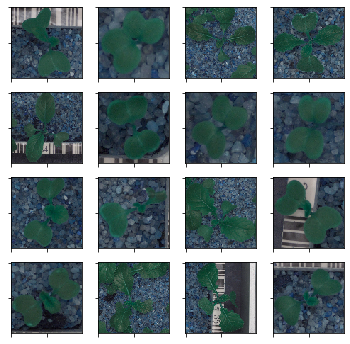

In [15]:
drawImage(1, 4, 4)

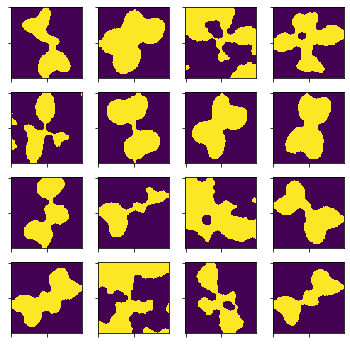

In [16]:
drawImageMask(1, 4, 4)

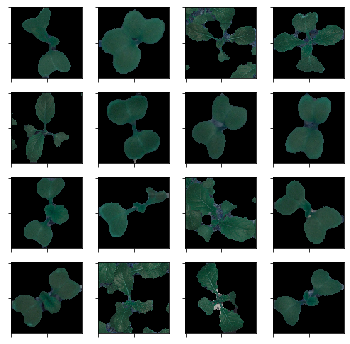

In [17]:
drawImagePlantSegmented(1, 4, 4)

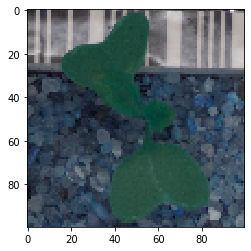

In [18]:
test_image = training_images[labels[1]][0]
plt.imshow(test_image)

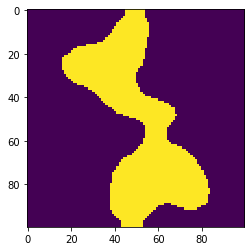

In [19]:
test_image_mask = create_mask_for_plant(test_image)
plt.imshow(test_image_mask)

In [20]:
contours = cv2.findContours(test_image_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
print("Contours length:", len(contours[0]))

Contours length: 130


==============================================

The code below this section will be used to train the models to identify the plant names.


In [21]:
train = ImageDataGenerator(rescale=1/255,
                           validation_split=0.2)

In [22]:
# ========================
# Parameters to be changed
imgHeight = 200
imgWidth = 200
batchSize = 3
# ========================

In [23]:
train_dataset = train.flow_from_directory(TRAIN_DATA_FOLDER, 
                                          target_size = (imgHeight, imgWidth),
                                          batch_size = batchSize,
                                          class_mode = 'binary',
                                          subset='training')

Found 3803 images belonging to 12 classes.


In [24]:
validation_dataset = train.flow_from_directory(TRAIN_DATA_FOLDER,
                                          target_size = (imgHeight, imgWidth),
                                          batch_size = batchSize,
                                          class_mode = 'binary',
                                          subset='validation')


Found 947 images belonging to 12 classes.


In [25]:
train_dataset.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [26]:
for plant in all_images.keys():
    for i in range(len(all_images[plant])):
        print(all_images[plant][i].shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [28]:
mapping = {}
index = 0;
for key in all_images.keys():
  mapping[key] = index
  index += 1

print(mapping)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


In [126]:
mapping_rev = {}
index = 0;
for key in all_images.keys():
  mapping_rev[index] = key
  index += 1

print(mapping_rev)

{0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed', 4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize', 8: 'Scentless Mayweed', 9: 'Shepherds Purse', 10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}


In [53]:
x_train = []
y_train = []
x_test = []
y_test = []
for plant in all_images.keys():
    count = 0
    for i in range(len(all_images[plant])):
        if count < 20:
            x_test.append(all_images[plant][i])
            y_test.append(mapping[plant])
        else:
            x_train.append(all_images[plant][i])
            y_train.append(mapping[plant])
        count += 1

x_train = np.stack(x_train)
x_test = np.stack(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print(y_train.shape)
print(y_test.shape)

(360,)
(240,)


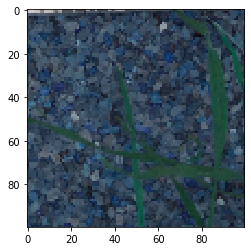

In [40]:
plt.imshow(x_train[0])

In [41]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [105]:
def resnet_v1(input_shape, depth, num_classes=12, dropout=0):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature 
    map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of 
    filters is
    doubled. Within each stage, the layers have the same number 
    filters and the same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tensorflow.keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    if dropout != 0:
        x = Dropout(dropout)(x)
        
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [43]:
# Training parameters
BATCH_SIZE = 32  # orig paper trained all networks with batch_size=128
EPOCHS = 10 # 10
USE_AUGMENTATION = True
NUM_CLASSES = np.unique(y_train).shape[0] # 12
COLORS = x_train.shape[3]

# Subtracting pixel mean improves accuracy
SUBTRACT_PIXEL_MEAN = True

# Model version
# Orig paper: version = 1 (ResNet v1), 
# Improved ResNet: version = 2 
# (ResNet v2)
VERSION = 1

# Computed depth from supplied model parameter n
if VERSION == 1:
    DEPTH = COLORS * 6 + 2
elif version == 2:
    DEPTH = COLORS * 9 + 2

In [44]:
import sys
sys.setrecursionlimit(50000)

In [45]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [54]:
# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
# if SUBTRACT_PIXEL_MEAN:
#     x_train_mean = np.mean(x_train, axis=0)
#     x_train -= x_train_mean
#     x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# Convert class vectors to binary class matrices.
y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))

print('y_train shape:', y_train.shape)

y_train = tensorflow.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASSES)

# Create the neural network
# if VERSION == 2:
#     model = resnet_v2(input_shape=input_shape, depth=DEPTH)
# else:
model = resnet_v1(input_shape=input_shape, depth=DEPTH)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()

x_train shape: (360, 100, 100, 3)
360 train samples
240 test samples
y_train shape: (360,)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 100, 100, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_38 (BatchNo (None, 100, 100, 16) 64          conv2d_42[0][0]                  
__________________________________________________________________________________________________
activation_38 (Activation)      (None, 100, 100, 16) 0           batch_normalization_38[0][0]     
_

In [55]:
import time

In [56]:
# Prepare callbacks for model saving and for learning rate adjustment.
lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]

In [160]:
def train_resnet(bs, epochs, lr, xtrain, ytrain, xtest, ytest, dp):
    model = resnet_v1(input_shape=input_shape, depth=DEPTH, dropout=dp)

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])
#     model.summary()


    model_fit = model.fit(xtrain, ytrain,
                  batch_size=bs,
                  epochs=epochs,
                  validation_data=(xtest, ytest),
                  shuffle=True,
#                   callbacks=callbacks
             )
    return model, model_fit

In [71]:
# Compare epochs

BATCH_SIZE = 32
LR = 0.01
EPOCHS = 10
DROPOUT = 0

model_1a, model_fit_1a = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/10
12/12 [==============================] - 33s 3s/step - loss: 5.9441 - accuracy: 0.0944 - val_loss: 132236360.0000 - val_accuracy: 0.0833
Epoch 2/10
12/12 [==============================] - 27s 2s/step - loss: 2.8477 - accuracy: 0.1111 - val_loss: 5063767.5000 - val_accuracy: 0.0833
Epoch 3/10
12/12 [==============================] - 29s 2s/step - loss: 2.7235 - accuracy: 0.1306 - val_loss: 106280.8594 - val_accuracy: 0.0833
Epoch 4/10
12/12 [==============================] - 30s 3s/step - loss: 2.6448 - accuracy: 0.1611 - val_loss: 17587.0645 - val_accuracy: 0.0875
Epoch 5/10
12/12 [==============================] - 29s 2s/step - loss: 2.5950 - accuracy: 0.1639 - val_loss: 754.8915 - val_accuracy: 0.1000
Epoch 6/10
12/12 [==============================] - 30s 3s/step - loss: 2.5699 - accuracy: 0.1750 - val_loss: 295.3689 - val_accuracy: 0.0667
Epoch 7/10
12/12 [==============================] - 28s 2s/step - loss: 2.4954 - accuracy: 0.2056 - val_loss: 194.2992 - val_accuracy

In [72]:
# Compare epochs

BATCH_SIZE = 32
EPOCHS = 20
LR = 0.01
DROPOUT = 0

model_1b, model_fit_1b = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
12/12 [==============================] - 35s 3s/step - loss: 4.9582 - accuracy: 0.0750 - val_loss: 44489436.0000 - val_accuracy: 0.0833
Epoch 2/20
12/12 [==============================] - 28s 2s/step - loss: 3.0488 - accuracy: 0.0944 - val_loss: 1206038.1250 - val_accuracy: 0.0833
Epoch 3/20
12/12 [==============================] - 30s 2s/step - loss: 2.7883 - accuracy: 0.1139 - val_loss: 35434.1055 - val_accuracy: 0.0875
Epoch 4/20
12/12 [==============================] - 30s 3s/step - loss: 2.7120 - accuracy: 0.1250 - val_loss: 1174.2321 - val_accuracy: 0.1042
Epoch 5/20
12/12 [==============================] - 29s 2s/step - loss: 2.5996 - accuracy: 0.1417 - val_loss: 271.9718 - val_accuracy: 0.0750
Epoch 6/20
12/12 [==============================] - 28s 2s/step - loss: 2.5291 - accuracy: 0.1833 - val_loss: 195.4220 - val_accuracy: 0.0625
Epoch 7/20
12/12 [==============================] - 28s 2s/step - loss: 2.4888 - accuracy: 0.1917 - val_loss: 64.5726 - val_accuracy: 0.

In [73]:
# Compare epochs

BATCH_SIZE = 32
EPOCHS = 30
LR = 0.01
DROPOUT = 0

model_1c, model_fit_1c = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/30
12/12 [==============================] - 51s 4s/step - loss: 5.3074 - accuracy: 0.0806 - val_loss: 324308864.0000 - val_accuracy: 0.0833
Epoch 2/30
12/12 [==============================] - 42s 4s/step - loss: 2.8051 - accuracy: 0.2083 - val_loss: 183313328.0000 - val_accuracy: 0.0708
Epoch 3/30
12/12 [==============================] - 44s 4s/step - loss: 2.5011 - accuracy: 0.2583 - val_loss: 4439173.5000 - val_accuracy: 0.0833
Epoch 4/30
12/12 [==============================] - 43s 4s/step - loss: 2.1975 - accuracy: 0.3639 - val_loss: 256763.9531 - val_accuracy: 0.0917
Epoch 5/30
12/12 [==============================] - 42s 4s/step - loss: 2.0088 - accuracy: 0.3944 - val_loss: 82950.0547 - val_accuracy: 0.0792
Epoch 6/30
12/12 [==============================] - 38s 3s/step - loss: 1.6473 - accuracy: 0.5000 - val_loss: 5821.1201 - val_accuracy: 0.0792
Epoch 7/30
12/12 [==============================] - 32s 3s/step - loss: 1.5293 - accuracy: 0.5500 - val_loss: 2615.1233 - val_

No handles with labels found to put in legend.


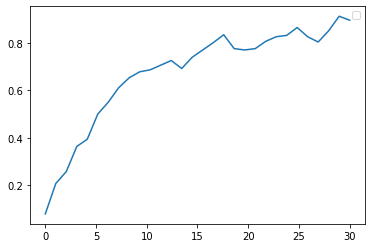

In [86]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 30, 30)

ax.plot(x, model_fit_1c.history['accuracy'])

ax.legend()
plt.show()

In [74]:
# Compare LR
model_2a = model_1b
model_fit_2a = model_fit_1b

In [75]:
# Compare LR

BATCH_SIZE = 32
EPOCHS = 20
LR = 0.05
DROPOUT = 0

model_2b, model_fit_2b = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
12/12 [==============================] - 33s 2s/step - loss: 8.5459 - accuracy: 0.0778 - val_loss: 7072423870464.0000 - val_accuracy: 0.0792
Epoch 2/20
12/12 [==============================] - 29s 2s/step - loss: 4.7749 - accuracy: 0.0889 - val_loss: 100796176.0000 - val_accuracy: 0.0833
Epoch 3/20
12/12 [==============================] - 29s 2s/step - loss: 4.3259 - accuracy: 0.0944 - val_loss: 560295.3750 - val_accuracy: 0.0875
Epoch 4/20
12/12 [==============================] - 30s 3s/step - loss: 4.2319 - accuracy: 0.0972 - val_loss: 17799.2480 - val_accuracy: 0.0833
Epoch 5/20
12/12 [==============================] - 30s 2s/step - loss: 3.9460 - accuracy: 0.1500 - val_loss: 14304.8154 - val_accuracy: 0.0833
Epoch 6/20
12/12 [==============================] - 30s 2s/step - loss: 3.5189 - accuracy: 0.2806 - val_loss: 1328.9264 - val_accuracy: 0.1083
Epoch 7/20
12/12 [==============================] - 29s 2s/step - loss: 3.1952 - accuracy: 0.2917 - val_loss: 712.4825 - val

In [76]:
# Compare LR

BATCH_SIZE = 32
EPOCHS = 20
LR = 0.005
DROPOUT = 0

model_2c, model_fit_2c = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
12/12 [==============================] - 32s 2s/step - loss: 4.3340 - accuracy: 0.1278 - val_loss: 726313.0625 - val_accuracy: 0.0875
Epoch 2/20
12/12 [==============================] - 28s 2s/step - loss: 2.6737 - accuracy: 0.1889 - val_loss: 476250.8750 - val_accuracy: 0.0958
Epoch 3/20
12/12 [==============================] - 29s 2s/step - loss: 2.2342 - accuracy: 0.3056 - val_loss: 40759.5195 - val_accuracy: 0.0875
Epoch 4/20
12/12 [==============================] - 29s 2s/step - loss: 1.9195 - accuracy: 0.3944 - val_loss: 9661.7783 - val_accuracy: 0.0708
Epoch 5/20
12/12 [==============================] - 29s 2s/step - loss: 1.6605 - accuracy: 0.4667 - val_loss: 2013.3177 - val_accuracy: 0.0875
Epoch 6/20
12/12 [==============================] - 29s 2s/step - loss: 1.5582 - accuracy: 0.5056 - val_loss: 1450.9816 - val_accuracy: 0.0875
Epoch 7/20
12/12 [==============================] - 29s 2s/step - loss: 1.3280 - accuracy: 0.6000 - val_loss: 720.5394 - val_accuracy: 0.

In [77]:
# Compare LR

BATCH_SIZE = 32
EPOCHS = 20
LR = 0.001
DROPOUT = 0

model_2d, model_fit_2d = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
12/12 [==============================] - 35s 3s/step - loss: 3.6511 - accuracy: 0.1222 - val_loss: 47.7277 - val_accuracy: 0.0958
Epoch 2/20
12/12 [==============================] - 31s 3s/step - loss: 2.2034 - accuracy: 0.2861 - val_loss: 44.5682 - val_accuracy: 0.1250
Epoch 3/20
12/12 [==============================] - 31s 3s/step - loss: 1.7265 - accuracy: 0.4667 - val_loss: 15.5312 - val_accuracy: 0.1250
Epoch 4/20
12/12 [==============================] - 29s 2s/step - loss: 1.3993 - accuracy: 0.6361 - val_loss: 27.9463 - val_accuracy: 0.0792
Epoch 5/20
12/12 [==============================] - 31s 3s/step - loss: 1.1609 - accuracy: 0.6972 - val_loss: 11.1147 - val_accuracy: 0.1417
Epoch 6/20
12/12 [==============================] - 29s 2s/step - loss: 0.9752 - accuracy: 0.7611 - val_loss: 6.6092 - val_accuracy: 0.1458
Epoch 7/20
12/12 [==============================] - 28s 2s/step - loss: 0.8122 - accuracy: 0.8139 - val_loss: 6.3541 - val_accuracy: 0.1333
Epoch 8/20
12/1

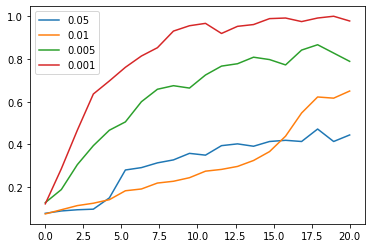

In [87]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 20, 20)

ax.plot(x, model_fit_2b.history['accuracy'], label="0.05")
ax.plot(x, model_fit_2a.history['accuracy'], label="0.01")
ax.plot(x, model_fit_2c.history['accuracy'], label="0.005")
ax.plot(x, model_fit_2d.history['accuracy'], label="0.001")

ax.legend()
plt.show()

In [78]:
# Compare Batch size

model_3a = model_2d
model_fit_3a = model_fit_2d

In [79]:
# Compare Batch size

BATCH_SIZE = 64
EPOCHS = 20
LR = 0.001
dropout = 0

model_3b, model_fit_3b = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
6/6 [==============================] - 30s 5s/step - loss: 3.8149 - accuracy: 0.1139 - val_loss: 717.5975 - val_accuracy: 0.0917
Epoch 2/20
6/6 [==============================] - 27s 5s/step - loss: 2.5416 - accuracy: 0.2111 - val_loss: 381.4868 - val_accuracy: 0.0833
Epoch 3/20
6/6 [==============================] - 27s 5s/step - loss: 1.9755 - accuracy: 0.4056 - val_loss: 71.9544 - val_accuracy: 0.0875
Epoch 4/20
6/6 [==============================] - 25s 4s/step - loss: 1.5100 - accuracy: 0.5722 - val_loss: 35.2600 - val_accuracy: 0.0875
Epoch 5/20
6/6 [==============================] - 25s 4s/step - loss: 1.2699 - accuracy: 0.6750 - val_loss: 17.9907 - val_accuracy: 0.0958
Epoch 6/20
6/6 [==============================] - 25s 4s/step - loss: 1.0457 - accuracy: 0.7583 - val_loss: 17.7496 - val_accuracy: 0.0875
Epoch 7/20
6/6 [==============================] - 25s 4s/step - loss: 0.8775 - accuracy: 0.8028 - val_loss: 10.6595 - val_accuracy: 0.1000
Epoch 8/20
6/6 [=========

In [169]:
# Compare Batch size

BATCH_SIZE = 16
EPOCHS = 20
LR = 0.001
DROPOUT = 0

model_3c, model_fit_3c = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
23/23 [==============================] - 39s 2s/step - loss: 3.0461 - accuracy: 0.1500 - val_loss: 20.6992 - val_accuracy: 0.0833
Epoch 2/20
23/23 [==============================] - 34s 2s/step - loss: 1.8158 - accuracy: 0.3944 - val_loss: 11.9024 - val_accuracy: 0.1000
Epoch 3/20
23/23 [==============================] - 34s 2s/step - loss: 1.4833 - accuracy: 0.5361 - val_loss: 4.0419 - val_accuracy: 0.1000
Epoch 4/20
23/23 [==============================] - 35s 2s/step - loss: 1.1544 - accuracy: 0.6583 - val_loss: 3.9581 - val_accuracy: 0.1458
Epoch 5/20
23/23 [==============================] - 34s 2s/step - loss: 0.9474 - accuracy: 0.7861 - val_loss: 2.9207 - val_accuracy: 0.2292
Epoch 6/20
23/23 [==============================] - 34s 1s/step - loss: 0.8060 - accuracy: 0.8194 - val_loss: 2.7642 - val_accuracy: 0.2667
Epoch 7/20
23/23 [==============================] - 36s 2s/step - loss: 0.5687 - accuracy: 0.9028 - val_loss: 2.3629 - val_accuracy: 0.3667
Epoch 8/20
23/23 [

In [107]:
# Compare Batch size

BATCH_SIZE = 128
EPOCHS = 20
LR = 0.001
DROPOUT = 0

model_3d, model_fit_3d = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
3/3 [==============================] - 32s 10s/step - loss: 3.6059 - accuracy: 0.1111 - val_loss: 96.7942 - val_accuracy: 0.0917
Epoch 2/20
3/3 [==============================] - 28s 10s/step - loss: 2.3950 - accuracy: 0.2528 - val_loss: 51.8113 - val_accuracy: 0.0917
Epoch 3/20
3/3 [==============================] - 29s 10s/step - loss: 2.0268 - accuracy: 0.3889 - val_loss: 40.3699 - val_accuracy: 0.1125
Epoch 4/20
3/3 [==============================] - 28s 10s/step - loss: 1.6558 - accuracy: 0.5278 - val_loss: 29.2947 - val_accuracy: 0.1125
Epoch 5/20
3/3 [==============================] - 27s 9s/step - loss: 1.4322 - accuracy: 0.5778 - val_loss: 25.7465 - val_accuracy: 0.0917
Epoch 6/20
3/3 [==============================] - 28s 10s/step - loss: 1.2247 - accuracy: 0.7250 - val_loss: 24.8329 - val_accuracy: 0.0958
Epoch 7/20
3/3 [==============================] - 28s 10s/step - loss: 1.0943 - accuracy: 0.7611 - val_loss: 20.3128 - val_accuracy: 0.0958
Epoch 8/20
3/3 [=====

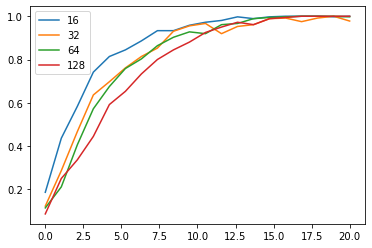

In [88]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 20, 20)

ax.plot(x, model_fit_3c.history['accuracy'], label="16")
ax.plot(x, model_fit_3a.history['accuracy'], label="32")
ax.plot(x, model_fit_3b.history['accuracy'], label="64")
ax.plot(x, model_fit_3d.history['accuracy'], label="128")

ax.legend()
plt.show()

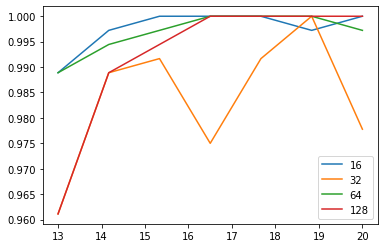

In [92]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(13, 20, 7)

ax.plot(x, model_fit_3c.history['accuracy'][13:], label="16")
ax.plot(x, model_fit_3a.history['accuracy'][13:], label="32")
ax.plot(x, model_fit_3b.history['accuracy'][13:], label="64")
ax.plot(x, model_fit_3d.history['accuracy'][13:], label="128")

ax.legend()
plt.show()

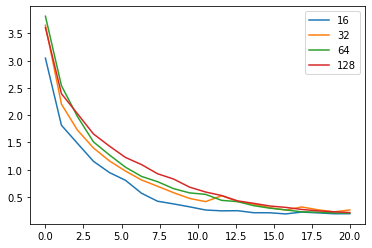

In [180]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 20, 20)

ax.plot(x, model_fit_3c.history['loss'], label="16")
ax.plot(x, model_fit_3a.history['loss'], label="32")
ax.plot(x, model_fit_3b.history['loss'], label="64")
ax.plot(x, model_fit_3d.history['loss'], label="128")

ax.legend()
plt.show()

In [170]:
model_4a = model_3c
model_fit_4a = model_fit_3c

In [171]:
# Adding dropout in

BATCH_SIZE = 16
EPOCHS = 20
LR = 0.001
DROPOUT = 0.1

model_4b, model_fit_4b = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
23/23 [==============================] - 32s 1s/step - loss: 3.7995 - accuracy: 0.1306 - val_loss: 34.8449 - val_accuracy: 0.0792
Epoch 2/20
23/23 [==============================] - 29s 1s/step - loss: 2.0871 - accuracy: 0.3361 - val_loss: 12.8515 - val_accuracy: 0.1000
Epoch 3/20
23/23 [==============================] - 29s 1s/step - loss: 1.6440 - accuracy: 0.4889 - val_loss: 11.5034 - val_accuracy: 0.0708
Epoch 4/20
23/23 [==============================] - 29s 1s/step - loss: 1.2392 - accuracy: 0.6806 - val_loss: 4.2146 - val_accuracy: 0.1167
Epoch 5/20
23/23 [==============================] - 29s 1s/step - loss: 1.0323 - accuracy: 0.7000 - val_loss: 3.1160 - val_accuracy: 0.1792
Epoch 6/20
23/23 [==============================] - 29s 1s/step - loss: 0.8149 - accuracy: 0.8000 - val_loss: 3.3478 - val_accuracy: 0.2000
Epoch 7/20
23/23 [==============================] - 29s 1s/step - loss: 0.7212 - accuracy: 0.8278 - val_loss: 2.4601 - val_accuracy: 0.2875
Epoch 8/20
23/23 

In [172]:
# Adding dropout in

BATCH_SIZE = 16
EPOCHS = 20
LR = 0.001
DROPOUT = 0.2

model_4c, model_fit_4c = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

Epoch 1/20
23/23 [==============================] - 31s 1s/step - loss: 3.1041 - accuracy: 0.1944 - val_loss: 50.4169 - val_accuracy: 0.0917
Epoch 2/20
23/23 [==============================] - 29s 1s/step - loss: 1.7892 - accuracy: 0.4250 - val_loss: 11.8372 - val_accuracy: 0.0833
Epoch 3/20
23/23 [==============================] - 29s 1s/step - loss: 1.4230 - accuracy: 0.5194 - val_loss: 7.7037 - val_accuracy: 0.0792
Epoch 4/20
23/23 [==============================] - 29s 1s/step - loss: 1.1665 - accuracy: 0.6694 - val_loss: 6.2516 - val_accuracy: 0.1083
Epoch 5/20
23/23 [==============================] - 29s 1s/step - loss: 0.9746 - accuracy: 0.7417 - val_loss: 3.6747 - val_accuracy: 0.2125
Epoch 6/20
23/23 [==============================] - 29s 1s/step - loss: 0.8650 - accuracy: 0.7389 - val_loss: 3.3971 - val_accuracy: 0.2250
Epoch 7/20
23/23 [==============================] - 29s 1s/step - loss: 0.9199 - accuracy: 0.7389 - val_loss: 4.5611 - val_accuracy: 0.1833
Epoch 8/20
23/23 [

In [161]:
# Adding dropout in

BATCH_SIZE = 16
EPOCHS = 20
LR = 0.001
DROPOUT = 0.4

model_4d, model_fit_4d = train_resnet(BATCH_SIZE, EPOCHS, LR, x_train, y_train_rs_categorical, x_test, y_test_rs_categorical, DROPOUT)

C:\Users\Kayton\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
23/23 [==============================] - 36s 1s/step - loss: 3.1395 - accuracy: 0.1694 - val_loss: 63.2875 - val_accuracy: 0.0875
Epoch 2/20
23/23 [==============================] - 32s 1s/step - loss: 2.0759 - accuracy: 0.3444 - val_loss: 18.0011 - val_accuracy: 0.0833
Epoch 3/20
23/23 [==============================] - 32s 1s/step - loss: 1.5464 - accuracy: 0.5333 - val_loss: 8.4692 - val_accuracy: 0.0958
Epoch 4/20
23/23 [==============================] - 32s 1s/step - loss: 1.2027 - accuracy: 0.6556 - val_loss: 4.6821 - val_accuracy: 0.1042
Epoch 5/20
23/23 [==============================] - 32s 1s/step - loss: 1.0432 - accuracy: 0.7306 - val_loss: 3.0218 - val_accuracy: 0.1542
Epoch 6/20
23/23 [==============================] - 32s 1s/step - loss: 0.7735 - accuracy: 0.8333 - val_loss: 2.6186 - val_accuracy: 0.2583
Epoch 7/20
23/23 [==============================] - 32s 1s/step - loss: 0.5971 - accuracy: 0.9167 - val_loss: 4.3901 - val_accuracy: 0.1708
Epoch 8/20
23/23 [

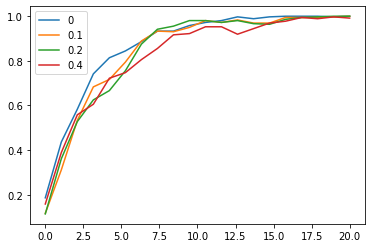

In [114]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 20, 20)

ax.plot(x, model_fit_4a.history['accuracy'], label="0")
ax.plot(x, model_fit_4b.history['accuracy'], label="0.1")
ax.plot(x, model_fit_4c.history['accuracy'], label="0.2")
ax.plot(x, model_fit_4d.history['accuracy'], label="0.4")

ax.legend()
plt.show()

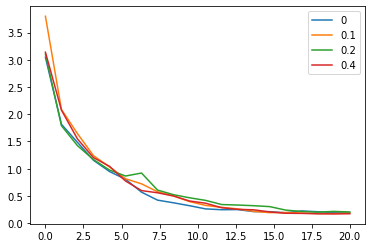

In [182]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 20, 20)

ax.plot(x, model_fit_4a.history['loss'], label="0")
ax.plot(x, model_fit_4b.history['loss'], label="0.1")
ax.plot(x, model_fit_4c.history['loss'], label="0.2")
ax.plot(x, model_fit_4d.history['loss'], label="0.4")

ax.legend()
plt.show()

In [119]:
test_data = np.asarray(test_images)
print(test_data.shape)

(794, 100, 100, 3)


In [173]:
# results_dr0.csv - dropout 0
# Accuracy on Kaggle - 0.37216

results = model_4a.predict(test_data)
results_string = []
for categories in results:
    category = np.argmax(categories)
    results_string.append(mapping_rev[category])
    
submission = list(zip(test_images_str, results_string))
csv_list = [ list(item) for item in submission ]

with open("results_dr0.csv", "w", newline='') as fp:
    writer = csv.writer(fp)
    writer.writerows(csv_list)

In [174]:
# results_dr01.csv - dropout 0.1
# Accuracy on Kaggle - 0.62594

results = model_4b.predict(test_data)
results_string = []
for categories in results:
    category = np.argmax(categories)
    results_string.append(mapping_rev[category])
    
submission = list(zip(test_images_str, results_string))
csv_list = [ list(item) for item in submission ]

with open("results_dr01.csv", "w", newline='') as fp:
    writer = csv.writer(fp)
    writer.writerows(csv_list)

In [175]:
# results_dr02.csv - dropout 0.2
# Accuracy on Kaggle - 0.64672

results = model_4c.predict(test_data)
results_string = []
for categories in results:
    category = np.argmax(categories)
    results_string.append(mapping_rev[category])
    
submission = list(zip(test_images_str, results_string))
csv_list = [ list(item) for item in submission ]

with open("results_dr02.csv", "w", newline='') as fp:
    writer = csv.writer(fp)
    writer.writerows(csv_list)

In [176]:
# results_dr04.csv - dropout 0.4
# Accuracy on Kaggle - 0.57745

results = model_4d.predict(test_data)
results_string = []
for categories in results:
    category = np.argmax(categories)
    results_string.append(mapping_rev[category])
    
submission = list(zip(test_images_str, results_string))
csv_list = [ list(item) for item in submission ]

with open("results_dr04.csv", "w", newline='') as fp:
    writer = csv.writer(fp)
    writer.writerows(csv_list)

In [178]:
for item in csv_list:
    print(item)

['0021e90e4.png', 'Small-flowered Cranesbill']
['003d61042.png', 'Loose Silky-bent']
['007b3da8b.png', 'Sugar beet']
['0086a6340.png', 'Common Chickweed']
['00c47e980.png', 'Black-grass']
['00d090cde.png', 'Loose Silky-bent']
['00ef713a8.png', 'Cleavers']
['01291174f.png', 'Loose Silky-bent']
['026716f9b.png', 'Loose Silky-bent']
['02cfeb38d.png', 'Loose Silky-bent']
['03566743d.png', 'Maize']
['03a2ee656.png', 'Small-flowered Cranesbill']
['03e322a29.png', 'Small-flowered Cranesbill']
['03ef36742.png', 'Scentless Mayweed']
['043449b0b.png', 'Common wheat']
['0437393b1.png', 'Fat Hen']
['04814f36d.png', 'Scentless Mayweed']
['05341a8a6.png', 'Shepherds Purse']
['060450d79.png', 'Common Chickweed']
['060f1dc84.png', 'Charlock']
['0625f063b.png', 'Common Chickweed']
['063363305.png', 'Small-flowered Cranesbill']
['06d12f6fa.png', 'Shepherds Purse']
['071cb3ece.png', 'Fat Hen']
['0751c0bbc.png', 'Cleavers']
['07e62f903.png', 'Charlock']
['085974290.png', 'Scentless Mayweed']
['0885e7690.p